## Importing libraries

In [1]:
"""
Libraries:
 - pandas: Dataframes
 - matplotlib: Graphics
 - numpy: Maths.
 - scikit-sklearn: Statistics.
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Implementing my own linear regression method

In [5]:
class Linear_regression:
    """
       parameters to instance the class:
           - X: predictor variable.
           - Y: criterion variable.
  
       methods:
           - coeficients(): return a dictionary with the value of the alpha and beta
           - Y_pred(): return a list with the ideal value of the criterion variable regarding the equation of the linear regression.
           - y_pred(x): return a value. input a number and it returns the prediction for this value.
           - SSR(): return the value of the sum of squares regression
           - SSE(): return the value of the sum of squares error   
           - SST(): return the value of the sum of squares total
           - r2(): return the value of the coefficient of determination
    """
   # Y criterion variable: we are going to predict this one / X predictor variable we base our predictions on it.
    def __init__(self, X ,Y):
        self.X = X
        self.Y = Y
  
   # Getting intercept (alpha) and  coeficients (beta) Y = alpha + beta * X
    def coeficients(self):
        x_mean = np.mean(self.X)
        y_mean = np.mean(self.Y)
        num = 0
        den = 0
        for i in range(len(X)):
            num += (self.X[i]-x_mean)*(self.Y[i]-y_mean)
            den += (self.X[i] - x_mean)**2
      
        beta = num / den
        alpha = y_mean - beta * +x_mean
        return {"alpha": alpha, "beta": beta}

   # getting an ideal Y   
    def Y_pred(self):
        coef = self.coeficients()
        alpha = coef["alpha"]
        beta = coef["beta"]
        return alpha + np.dot(beta,self.X)
    
   #getting a single value of y
    def y_pred(self,x):
        coef = self.coeficients()
        alpha = coef["alpha"]
        beta = coef["beta"]
        return alpha + beta * x

   # sum of squares regression
    def SSR(self):
        y_pred=self.Y_pred()
        ssr=(y_pred - np.mean(self.Y))**2
        return sum(ssr)
    
   # sum of squares error
    def SSE(self):
        y_pred=self.Y_pred()
        sse=(y_pred-self.Y)**2
        return sum(sse)

   # sum of squares total.
    def SST(self):
        SST=(self.Y - np.mean(self.Y) )**2
        return sum(SST)
    
   # The coefficient of determination, or R2, is a measure that provides information about the goodness of fit of a model
    def r2(self):
        return self.SSR()/self.SST() 


## Importing data

In [8]:
path = "Historical Data Annual.csv"
df_commodity = pd.read_csv(path)
#Inspecting the first 8 rows
df_commodity.head(8)

,World Bank Commodity Price Data (The Pink Sheet),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,"annual prices, 1960 to present, nominal US dol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(annual series are available in nominal and re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Updated on October 04, 2022",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South Afican","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
6,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,($/mt),($/dmtu),($/mt),($/mt),($/mt),($/mt),($/mt),($/troy oz),($/troy oz),($/troy oz)
7,1960,"1,63","1,63","1,63",…,…,…,"0,14","0,4",…,...,"511,47","11,42","678,76","198,85","2196,73",1631,"246,19","35,27","83,5","0,91"


## Data wrangling

In [9]:
# changing the headers to row 6 (python row starts in 0)
df_commodity = pd.read_csv(path, header=6)
df_commodity.head(8)

,Unnamed: 0,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian","Coal, South Afican","Natural gas, US","Natural gas, Europe","Liquefied natural gas, Japan",...,Aluminum,"Iron ore, cfr spot",Copper,Lead,Tin,Nickel,Zinc,Gold,Platinum,Silver
0,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,($/mt),($/dmtu),($/mt),($/mt),($/mt),($/mt),($/mt),($/troy oz),($/troy oz),($/troy oz)
1,1960.0,"1,63","1,63","1,63",…,…,…,"0,14","0,4",…,...,"511,47","11,42","678,76","198,85","2196,73",1631,"246,19","35,27","83,5","0,91"
2,1961.0,"1,57","1,57","1,57",…,…,…,"0,15","0,4",…,...,"511,47","11,02","633,08","176,98","2449,89",1711,"214,31","35,25","83,5","0,92"
3,1962.0,"1,52","1,52","1,52",…,…,…,"0,16","0,4",…,...,"498,06","11,01","645,14","155,28","2471,38",1761,"185,93","35,23","83,5","1,08"
4,1963.0,"1,5","1,5","1,5",…,…,…,"0,16","0,39",…,...,"498,8","11,02","645,95","174,81","2507,73","1741,67","211,51","35,09","80,93","1,28"
5,1964.0,"1,45","1,45","1,45",…,…,…,"0,15","0,38",…,...,"525,99","10,24","969,75","277,88","3412,74","1741,67","326,49","35,1","88,48","1,29"
6,1965.0,"1,42","1,42","1,42",…,…,…,"0,16","0,41",…,...,"540,13","10,66","1292,84","317,18","3890,78",1735,"311,25","35,12","98,04","1,29"
7,1966.0,"1,36","1,36","1,36",…,…,…,"0,16","0,42",…,...,"540,13","9,52","1531,51","260,65","3573,51",1739,"281,11","35,13","99,72","1,29"


In [10]:
# saving the units in one dataframe.
units =df_commodity[:1]

In [11]:
# selecting the rows I need.
df_commodity = df_commodity[1:]

In [12]:
# Renaming the first column
df_commodity = df_commodity.rename(columns={"Unnamed: 0":"Year"})

In [13]:
# Getting the name of the columns
columns = df_commodity.columns.values

In [14]:
# Keeping the columns I need
columns_keep = ['Year', 'Crude oil, Brent', 'Natural gas, US', 'Natural gas, Europe', 'Maize', 'Meat, chicken']
df_commodity = df_commodity[columns_keep]

In [15]:
df_commodity.head()

,Year,"Crude oil, Brent","Natural gas, US","Natural gas, Europe",Maize,"Meat, chicken"
1,1960.0,"1,63","0,14","0,4","44,5","0,3"
2,1961.0,"1,57","0,15","0,4","44,96","0,31"
3,1962.0,"1,52","0,16","0,4","48,65","0,32"
4,1963.0,"1,5","0,16","0,39","53,77","0,33"
5,1964.0,"1,45","0,15","0,38","54,63","0,34"


In [16]:
# transform each column into a list
Year = df_commodity["Year"].tolist()
Crude = df_commodity["Crude oil, Brent"].tolist()
Gas_Usa = df_commodity["Natural gas, US"].tolist()
Gas_Europe = df_commodity["Natural gas, Europe"].tolist()
Maize = df_commodity["Maize"].tolist()
Meat_Chicken = df_commodity["Meat, chicken"].tolist()

In [18]:
# transform each value in the list into float and replace the symbol for separating decimals.
for i in range(len(Crude)):
    Crude[i]=float(Crude[i].replace(",","."))
    Gas_Europe[i] = float(Gas_Europe[i].replace(",","."))
    Gas_Usa[i]=float(Gas_Usa[i].replace(",","."))
    Maize[i] = float(Maize[i].replace(",","."))
    Meat_Chicken[i] = float(Meat_Chicken[i].replace(",","."))

In [19]:
# Making a dictionary to transform it into dataframe
commodities = {"Year": Year,
              "Crude Oil: Brent": Crude,
              "Natural gas: US": Gas_Usa,
              "Natural gas: Europe": Gas_Europe,
              "Maize": Maize,
              "Meat: Chicken": Meat_Chicken}

In [20]:
# Dataframe clean
df_commodity = pd.DataFrame.from_dict(commodities)
df_commodity.head()

,Year,Crude Oil: Brent,Natural gas: US,Natural gas: Europe,Maize,Meat: Chicken
0,1960.0,1.63,0.14,0.40,44.50,0.30
1,1961.0,1.57,0.15,0.40,44.96,0.31
2,1962.0,1.52,0.16,0.40,48.65,0.32
3,1963.0,1.50,0.16,0.39,53.77,0.33
4,1964.0,1.45,0.15,0.38,54.63,0.34


## Visualizations

**Evolution of the price of Crude, Natural gas in Europe and USA**

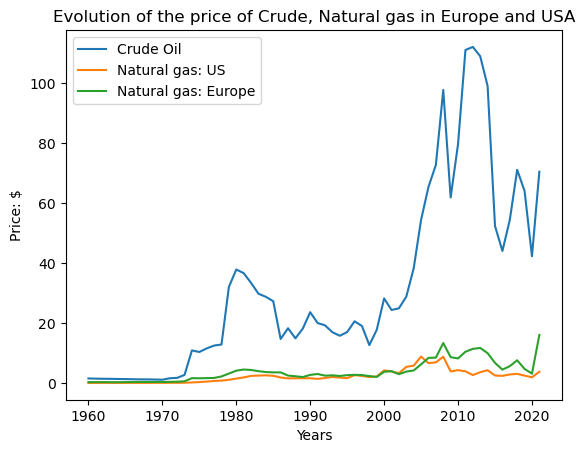

In [21]:
plt.plot(df_commodity["Year"],df_commodity['Crude Oil: Brent'])
plt.plot(df_commodity["Year"], df_commodity["Natural gas: US"])
plt.plot(df_commodity["Year"], df_commodity["Natural gas: Europe"])
plt.xlabel("Years")
plt.ylabel("Price: $")
plt.title("Evolution of the price of Crude, Natural gas in Europe and USA")
plt.legend(["Crude Oil","Natural gas: US", "Natural gas: Europe"])
plt.show()

**Evolution of the price of Crude Oil, Meat: Chicken and Maize**

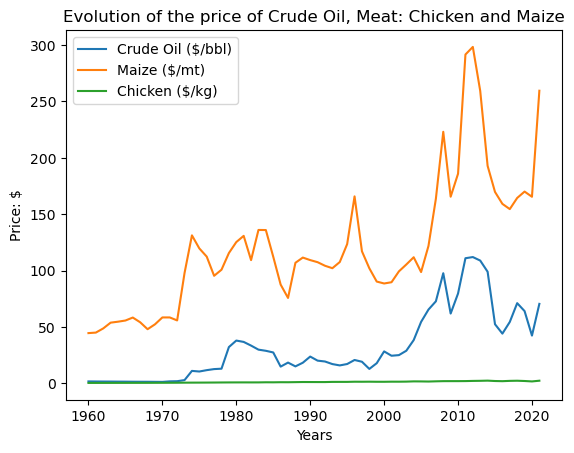

In [22]:
plt.plot(df_commodity["Year"],df_commodity['Crude Oil: Brent'])
plt.plot(df_commodity["Year"], df_commodity["Maize"])
plt.plot(df_commodity["Year"], df_commodity["Meat: Chicken"])
plt.xlabel("Years")
plt.ylabel("Price: $")
plt.title("Evolution of the price of Crude Oil, Meat: Chicken and Maize")
plt.legend(["Crude Oil ($/bbl)","Maize ($/mt)", "Chicken ($/kg)"])
plt.show()

**Visualizing the relationship between different variables.**

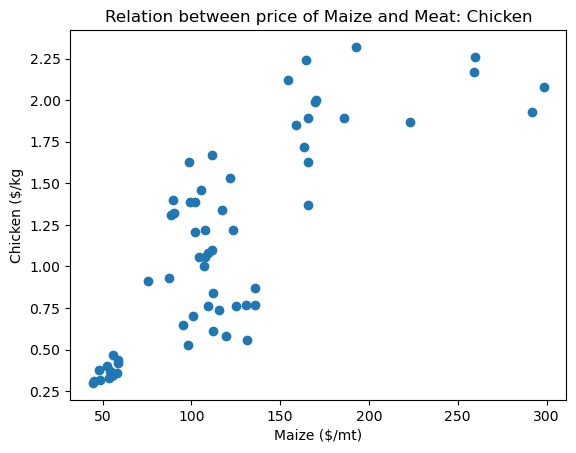

In [24]:
plt.scatter(df_commodity["Maize"],df_commodity["Meat: Chicken"])
plt.xlabel("Maize ($/mt)")
plt.ylabel("Chicken ($/kg")
plt.title("Relation between price of Maize and Meat: Chicken")
plt.show()

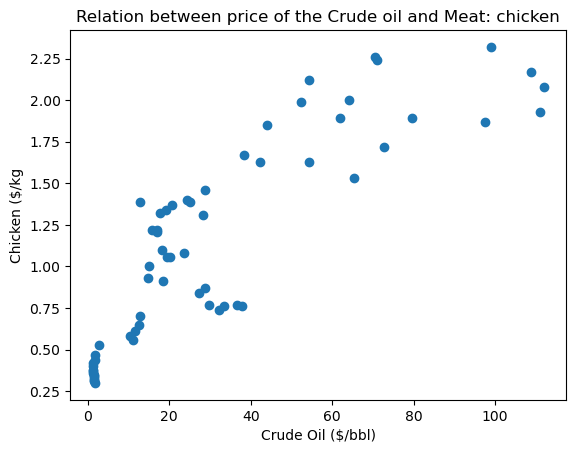

In [25]:
plt.scatter(df_commodity['Crude Oil: Brent'],df_commodity["Meat: Chicken"])
plt.xlabel("Crude Oil ($/bbl)")
plt.ylabel("Chicken ($/kg")
plt.title("Relation between price of the Crude oil and Meat: chicken")
plt.show()

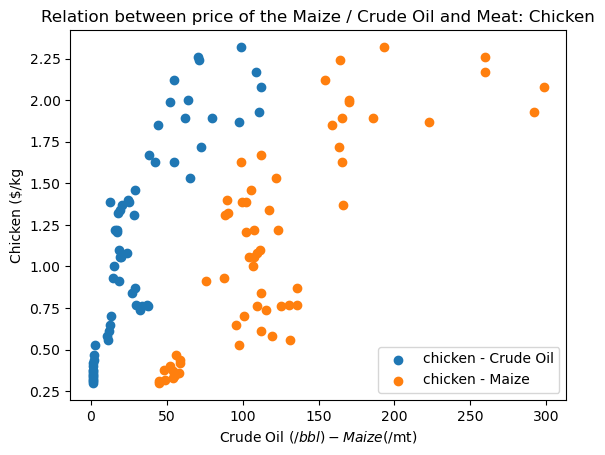

In [26]:
plt.scatter(df_commodity['Crude Oil: Brent'],df_commodity["Meat: Chicken"])
plt.scatter(df_commodity["Maize"],df_commodity["Meat: Chicken"])
plt.xlabel("Crude Oil ($/bbl) - Maize ($/mt)")
plt.ylabel("Chicken ($/kg")
plt.title("Relation between price of the Maize / Crude Oil and Meat: Chicken")
plt.legend(["chicken - Crude Oil", "chicken - Maize"])
plt.show()

**Correlation between variables**

In [27]:
df_commodity.corr()

,Year,Crude Oil: Brent,Natural gas: US,Natural gas: Europe,Maize,Meat: Chicken
Year,1.000000,0.793942,0.722090,0.771721,0.764014,0.978855
Crude Oil: Brent,0.793942,1.000000,0.705059,0.934176,0.904533,0.854607
Natural gas: US,0.722090,0.705059,1.000000,0.728008,0.519663,0.726872
Natural gas: Europe,0.771721,0.934176,0.728008,1.000000,0.883441,0.832157
Maize,0.764014,0.904533,0.519663,0.883441,1.000000,0.805959
Meat: Chicken,0.978855,0.854607,0.726872,0.832157,0.805959,1.000000


## Linear Regression

**Simple linear regression**  
**Using my algorithm**

In [36]:
# Generating the model
X = df_commodity["Maize"].tolist()
Y = df_commodity["Meat: Chicken"].tolist()
lr1 = Linear_regression(X,Y)

In [30]:
#Obtaining the coeficients
coef1 = lr1.coeficients()
coef1

{'alpha': 0.1123419700346795, 'beta': 0.008516484407892955}

In [31]:
# Obtaining r-squared
r2 = lr1.r2()
r2

0.6495700836856255

**Using Scikit-learn**

In [39]:
X =np.array(X).reshape(-1,1)
lm = LinearRegression()
lm.fit(X,Y)
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)
print("r2:",lm.score(X,Y))

Intercept: 0.11234197003467883
Coefficients: [0.00851648]
r2: 0.649570083685626


**_Comparing result:_**

|     | **Own Algorithm** | **Scikit-Learn** |
|-----|---------------|--------------|
|**Coefficients**|0.008516484407892955|0.00851648|
|**r2**|0.6495700836856255|0.649570083685626

In [40]:
X = df_commodity['Crude Oil: Brent'].tolist()
Y = df_commodity["Meat: Chicken"].tolist()
lr2 = Linear_regression(X,Y)
coef2 = lr2.coeficients()
print(coef2)
print("r2:",lr2.r2())

{'alpha': 0.5915167947028793, 'beta': 0.01723668290725204}
r2: 0.7303533936790886


**Multiple Linear Regression**

In [33]:
# Using scikit-learn

feature_cols = ["Crude Oil: Brent","Maize"]
X = df_commodity[feature_cols]
Y = df_commodity["Meat: Chicken"]
              
lm = LinearRegression()
lm.fit(X,Y)

print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)
print("r2:",lm.score(X,Y))

Intercept: 0.46579373371401434
Coefficients: [0.01393167 0.0019143 ]
r2: 0.7363204878157787


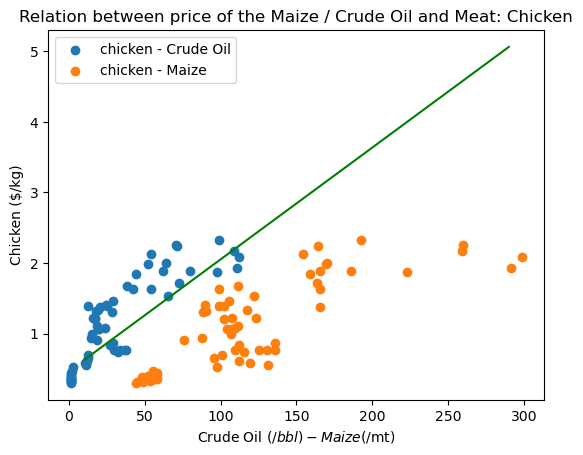

In [42]:
X = [10,30,50,70,90,110,130,150,170,190,210,230,250,270,290]
Y = 0.46579373371401456 + np.dot(0.01393167,X) + np.dot(0.0019143,X)
 
plt.scatter(df_commodity['Crude Oil: Brent'],df_commodity["Meat: Chicken"])
plt.scatter(df_commodity["Maize"],df_commodity["Meat: Chicken"])
plt.plot(X,Y,"g")
plt.xlabel("Crude Oil ($/bbl) - Maize ($/mt)")
plt.ylabel("Chicken ($/kg)")
plt.title("Relation between price of the Maize / Crude Oil and Meat: Chicken")
plt.legend(["chicken - Crude Oil", "chicken - Maize"])
plt.show()